In [4]:
from IPython.display import display, HTML

# Design an App that predicts movie genres and detects spoilers in reviews

Hi There! I don’t know how much time do you usually spend picking a movie to watch with your significant other or with your friends, but for me it usually takes a lot of time. What I found is that agreeing on a movie genre will usually help. I am also sure that many of you look at the reviews before picking a movie hoping to decide if a movie is worth watching and that you came across spoilers instead that took away all the intrigue!! Well it happened to me and that’s why I wanted to design an app that predicts movie genres and detects spoilers.

### Part1: Get movie titles from the IMDB website

Author: Sana Krichen    
https://www.linkedin.com/in/sanakrichen/    
https://github.com/skrichen
    

The first step of my project is to get a dataset either by looking into the published ones or by scraping it. I have to find something to work with that will help me achieve my goals. 
The first part of my project (aka predict movie genres) requires my dataset to have unique ids, movie titles, year of release, movie genres and movie plots or synopsis. I soon realized that such a dataset does not exist and I that I will have to scraped the IMDB website to get that.
The second part of my project (detecting spoilers in reviews) requires to have a dataset that encapsulates movie ids, movie reviews and another column that specifies if a movie is a spoiler or not. I was lucky enough to find that a dataset that have those requirements is already published in Kaggle https://www.kaggle.com/rmisra/imdb-spoiler-dataset 
So now after doing my little search, I am setting my first objective: scrape the IMDB website to build my first dataset. In order to achieve the previously mentioned goal, it is essential to do some exploratory work to find out how the IMDB website is structured and to identify an efficient way to access the set of pages that I need to scrape.
Likely the IMDB website is really easy to work with and all I need to access a particular movie page is the unique identifier of the movie that shows up in the url.
<img src="https://drive.google.com/uc?export=view&id=1UwfUC1QNzXrNIFU77NfwZ75dOoAnZFcv" width="640" height="480">

My next step is now obvious. I need to collect those unique identifiers to access the movie pages. IMDB has some basic dataset ready to be used. I want to explore one of their datasets, extract the the movies' titles and their unique ID: tconst. The goal is to use them in order to access the web pages that I want.


Let's import our usual packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [6]:
# I found this dataset in the IMDB website. I want to import it as a DataFrame to explore it
IMDB_basics = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz',  sep='\t', low_memory=False)
IMDB_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
7023992,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
7023993,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
7023994,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
7023995,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [9]:
#Let's check the shape of the DataFrame
IMDB_basics.shape

(7023997, 9)

In [10]:
#Let's check the info of the DataFrame
IMDB_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7023997 entries, 0 to 7023996
Data columns (total 9 columns):
tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtypes: int64(1), object(8)
memory usage: 482.3+ MB


In [11]:
# #Let's look for null values
IMDB_basics.isna().sum()

tconst             0
titleType          0
primaryTitle      10
originalTitle     10
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            13
dtype: int64

Obervations and Plan of Actions 1:

Few things that we notice already:
   - \N stand for null values and yet are not read as such. We need to rectify that.
   - Explore the `genres` column
    
    

In [12]:
# Let's check the structure of the column `genres`
IMDB_basics['genres'].unique()

array(['Documentary,Short', 'Animation,Short', 'Animation,Comedy,Romance',
       ..., 'Documentary,Reality-TV,Romance',
       'Musical,Reality-TV,Talk-Show', 'Comedy,Mystery,Talk-Show'],
      dtype=object)

hmm.. after checking the IMDB website , it looks like this column is keeping the first 3 genres from a full list of genres. It is not showing the most relevant ones but rather the first ones that were sorted alphabetically. 
<img src="https://drive.google.com/uc?export=view&id=15qE5i3pp6I9UnbMDs90Mnam9pR7kUXlW" width="640" height="480">

# <p style="text-align: center;"> VS
<img src="https://drive.google.com/uc?export=view&id=19RlgAxr9DCBpiXDlRL_bwyaLCAKkm8LR" width="640" height="480">


Eventually, I will need to do some web scraping for genres too.. and when the time comes, it is important to know where to look... 

In [13]:
# replace \N by nan
IMDB_basics.replace('\\N', np.nan, inplace= True)

In [14]:
IMDB_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
7023992,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,NaN,NaN,"Action,Drama,Family"
7023993,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,NaN,NaN,"Action,Drama,Family"
7023994,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,NaN,NaN,"Action,Drama,Family"
7023995,tt9916856,short,The Wind,The Wind,0,2015,NaN,27,Short


Nice!! Now it is possible to recongnize null values...Let's explore the `titleType` column and, the `startYear` column. 

In [15]:
#Check the types of the titles/entries
IMDB_basics['titleType'].unique()# hmm quite many types!!

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

There are many different types of entries titles but for this problem, the focus should be on the type movie... 

In [16]:
# Look for null values in the `startYear` column
IMDB_basics['startYear'].isna().sum()

570022

In [17]:
# Look for all the unique `startYear`
IMDB_basics['startYear'].unique()


array(['1894', '1892', '1893', '1895', '1896', '1898', '1897', '1900',
       '1899', '1901', '1904', '1903', '1902', '1905', '1912', '1907',
       '1906', '1908', '1910', '1909', '1914', '1911', '1913', '1915',
       '1919', '1916', '1917', '1918', '1936', '1925', '1920', '1922',
       '1921', '1923', '1924', '1928', '1926', '1927', '1929', '1993',
       '1935', '2014', '1930', '2004', '1942', '1934', '1931', '1932',
       '1939', '1937', '1933', '1950', '1938', '1951', '1945', '1946',
       '1940', '1944', '1949', '1947', '1941', '1952', '1970', '1957',
       '1943', '1959', '1948', '2001', '1953', '1954', '1965', '1983',
       '1980', '1973', '1961', '1995', '1955', '1962', '1958', '1956',
       '1960', '1964', '1967', '1968', '1963', '1969', '1985', '1971',
       '1972', '1966', '1976', '1986', '1990', '2020', '1979', '1987',
       '1974', '1978', '1981', '1988', '1975', '1982', '1977', '2010',
       '2000', '1989', nan, '2018', '1984', '1992', '1991', '1994',
       '1

AHA!! Unreleased movies and nan values... I wonder what is the movie that will be released in year '2115'!!! haha

In [18]:
IMDB_basics[IMDB_basics['startYear']=='2115'] ## I will check it out on the IMDB website

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
4828679,tt5174640,short,100 Years,100 Years,0,2115,NaN,NaN,"Drama,Short"


HAHA, the movie's name is 100 years... Not suprising!

Obervations and Plan of Actions 2:

    - IMDB has many types of movies and shows. Let's pick only the type 'movie'
    
    - Let's also discard all adults movies
    
    - Let's drop all the movies with the 'startYear' > 2020 and with nan values. This column dtype is object.. It is definitely required to change the type to int before proceeding with the filtering
  

In [19]:
# Picking the type movie and non adult movies
df_basics=IMDB_basics[(IMDB_basics['titleType']=='movie') & (IMDB_basics['isAdult']==0)]

In [20]:
df_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,NaN,45,Romance
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,NaN,20,"Documentary,News,Sport"
332,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,NaN,NaN,"Biography,Drama"
499,tt0000502,movie,Bohemios,Bohemios,0,1905,NaN,100,NaN
571,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,NaN,70,"Biography,Crime,Drama"
...,...,...,...,...,...,...,...,...,...
7023886,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,NaN,57,Documentary
7023913,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,NaN,100,Documentary
7023925,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,NaN,NaN,Comedy
7023936,tt9916730,movie,6 Gunn,6 Gunn,0,2017,NaN,116,NaN


In [21]:
df_basics.isna().sum()

tconst                 0
titleType              0
primaryTitle           0
originalTitle          0
isAdult                0
startYear          65013
endYear           548019
runtimeMinutes    200438
genres             69718
dtype: int64

I need to drop the rows with the nan values

In [22]:
# Keep the rows that don't have null values
df_basics=df_basics[df_basics['startYear'].notna()]
df_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,NaN,45,Romance
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,NaN,20,"Documentary,News,Sport"
332,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,NaN,NaN,"Biography,Drama"
499,tt0000502,movie,Bohemios,Bohemios,0,1905,NaN,100,NaN
571,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,NaN,70,"Biography,Crime,Drama"
...,...,...,...,...,...,...,...,...,...
7023886,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,NaN,57,Documentary
7023913,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,NaN,100,Documentary
7023925,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,NaN,NaN,Comedy
7023936,tt9916730,movie,6 Gunn,6 Gunn,0,2017,NaN,116,NaN


In [23]:
# Change the dtype to int
df_basics['startYear'] = df_basics['startYear'].astype(int)

/Users/SanaKrichen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
# make sure that we got rid of the null values
df_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483006 entries, 8 to 7023947
Data columns (total 9 columns):
tconst            483006 non-null object
titleType         483006 non-null object
primaryTitle      483006 non-null object
originalTitle     483006 non-null object
isAdult           483006 non-null int64
startYear         483006 non-null int64
endYear           0 non-null object
runtimeMinutes    341959 non-null object
genres            416190 non-null object
dtypes: int64(2), object(7)
memory usage: 36.9+ MB


In [25]:
df_basics['startYear']


8          1894
145        1897
332        1900
499        1905
571        1906
           ... 
7023886    2015
7023913    2007
7023925    2013
7023936    2017
7023947    2013
Name: startYear, Length: 483006, dtype: int64

In [26]:
# I would like to only pick the movies such as the release date is between 1950 and 2020
(df_basics['startYear']<=2020) &(df_basics['startYear']>=1950)

8          False
145        False
332        False
499        False
571        False
           ...  
7023886     True
7023913     True
7023925     True
7023936     True
7023947     True
Name: startYear, Length: 483006, dtype: bool

In [27]:
df_movies = df_basics[(df_basics['startYear']<=2020) &(df_basics['startYear']>=1950)]
df_movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
15494,tt0015724,movie,Dama de noche,Dama de noche,0,1993,NaN,102,"Drama,Mystery,Romance"
16664,tt0016906,movie,Frivolinas,Frivolinas,0,2014,NaN,80,"Comedy,Musical"
21282,tt0021617,movie,Arizona Territory,Arizona Territory,0,1950,NaN,56,"Action,Adventure,Western"
21719,tt0022064,movie,Lebbra bianca,Lebbra bianca,0,1951,NaN,100,Drama
25125,tt0025557,movie,El negro que tenía el alma blanca,El negro que tenía el alma blanca,0,1951,NaN,87,"Drama,Musical"
...,...,...,...,...,...,...,...,...,...
7023886,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,NaN,57,Documentary
7023913,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,NaN,100,Documentary
7023925,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,NaN,NaN,Comedy
7023936,tt9916730,movie,6 Gunn,6 Gunn,0,2017,NaN,116,NaN


Now it is time to grap only what we need from this dataset which are the `tconst`, `originalTitle` and the `startYear` columns.

In [28]:
df_movies=df_movies[['tconst','primaryTitle' ,'startYear']]

In [29]:
df_movies

,tconst,primaryTitle,startYear
15494,tt0015724,Dama de noche,1993
16664,tt0016906,Frivolinas,2014
21282,tt0021617,Arizona Territory,1950
21719,tt0022064,Lebbra bianca,1951
25125,tt0025557,El negro que tenía el alma blanca,1951
...,...,...,...
7023886,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015
7023913,tt9916680,De la ilusión al desconcierto: cine colombiano...,2007
7023925,tt9916706,Dankyavar Danka,2013
7023936,tt9916730,6 Gunn,2017


In [31]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410601 entries, 15494 to 7023947
Data columns (total 3 columns):
tconst          410601 non-null object
primaryTitle    410601 non-null object
startYear       410601 non-null int64
dtypes: int64(1), object(2)
memory usage: 12.5+ MB


I now collected 410601 movie ids to use for my web scraping...I believe that is a lot, if scraping a movie take 1s, going through all these requests will take around 5 days! That is obviously not an option. Let's remember the purpose of collecting the IDs.. Those will be useful to access movie pages so scraping their genres and their movie plots becomes possible. One thing that I found out while diving into the IMDB website is that movies that are unpopular (low rating) usually don't have a movie plot... so giving the time constraint that I am dealing with right now (capstone project deadline), I would like to filter even further the titles that I need to loop over with my web scraper and target the movies that have a rating of 6 and beyond. You will notice that I don't have movie ratings here... But another dataset from the imdb website do.. so let's use it and explore it to only keep popular movies.

Let's look at the dataset from the IMDB website that include the ratings

In [3]:
IMDB_ratings = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz',  sep='\t', low_memory=False)
IMDB_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1637
1,tt0000002,6.1,198
2,tt0000003,6.5,1328
3,tt0000004,6.2,120
4,tt0000005,6.1,2112
...,...,...,...
1059238,tt9916580,7.2,5
1059239,tt9916690,6.6,5
1059240,tt9916720,5.9,56
1059241,tt9916766,6.9,14


Let's take a look at the histogram distribution of the ratings

(array([  3829.,   7985.,  17666.,  37726.,  83579., 165510., 270687.,
        289577., 145491.,  31960.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

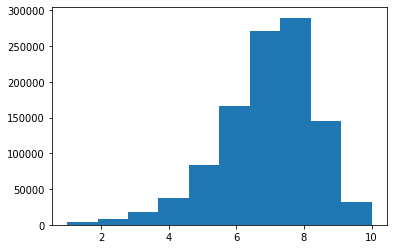

In [184]:
plt.figure()
plt.hist(IMDB_ratings['averageRating'])

In [217]:
# Select movies with an average of 6 and beyond
df_ratings = IMDB_ratings[IMDB_ratings['averageRating']>=6]

I need to perform an inner join of the two dataframes so I will only get existing movies from both sides

In [218]:
# Merge the two dataframes using an inner join
result = pd.merge(df_movies, df_ratings, how='inner', on='tconst')


In [219]:
# Select only the columns that I need
result=result[['tconst','primaryTitle' ,'startYear']]

In [220]:
result

,tconst,primaryTitle,startYear
0,tt0015724,Dama de noche,1993
1,tt0025557,El negro que tenía el alma blanca,1951
2,tt0030998,You're Only Young Twice,1952
3,tt0031458,El huésped del sevillano,1970
4,tt0031603,Made in Germany - Die dramatische Geschichte d...,1957
...,...,...,...
135717,tt9914644,9/11: Escape from the Towers,2018
135718,tt9914942,La vida sense la Sara Amat,2019
135719,tt9915790,Bobbyr Bondhura,2019
135720,tt9916160,Drømmeland,2019


Ok now I have 135722... That's better but still too long to loop over using my web scraper... Because of that I decided to divide my dataframe by decades and export it the every collection of movies/decade to a different CSV file. The purpose of this is to use the scraper in parallel over multiple CSV files to save time. I can afterwards put the scraped data back together into one single file.

In [221]:
# let's test how this code works ===> split by decade
result['startYear'].between(1990, 1999, inclusive=True)

0          True
1         False
2         False
3         False
4         False
          ...  
135717    False
135718    False
135719    False
135720    False
135721    False
Name: startYear, Length: 135722, dtype: bool

OK! That's nice. 
Let's now do it for every decade!

In [224]:
result[result['startYear']==2020].to_csv(f'/Users/SanaKrichen/Desktop/Brainstation/Capstone Project/df_twothousandstwenties.csv', index = False, header=True)

In [151]:
result[result['startYear'].between(2010, 2019, inclusive=True)].to_csv(f'/Users/SanaKrichen/Desktop/Brainstation/Capstone Project/df_twothousandstens.csv', index = False, header=True)

In [152]:
result[result['startYear'].between(2000, 2009, inclusive=True)].to_csv(f'/Users/SanaKrichen/Desktop/Brainstation/Capstone Project/df_twothousands.csv', index = False, header=True)

In [133]:
result[result['startYear'].between(1990, 1999, inclusive=True)].to_csv(f'/Users/SanaKrichen/Desktop/Brainstation/Capstone Project/df_nineties.csv', index = False, header=True)

In [162]:
result[result['startYear'].between(1980, 1999, inclusive=True)].to_csv(f'/Users/SanaKrichen/Desktop/Brainstation/Capstone Project/df_eighties.csv', index = False, header=True)

In [190]:
result[result['startYear'].between(1970, 1979, inclusive=True)].to_csv(f'/Users/SanaKrichen/Desktop/Brainstation/Capstone Project/df_seventies.csv', index = False, header=True)

In [222]:
result[result['startYear'].between(1960, 1969, inclusive=True)].to_csv(f'/Users/SanaKrichen/Desktop/Brainstation/Capstone Project/df_sixties.csv', index = False, header=True)

In [223]:
result[result['startYear'].between(1950, 1959, inclusive=True)].to_csv(f'/Users/SanaKrichen/Desktop/Brainstation/Capstone Project/df_fifties.csv', index = False, header=True)


Now we ended up exporting many CSV files. Every CSV file has a collection of movies of a certain decade (from 1950-2020). Every CSV file has the columns `tconst`, `primaryTitle`, `startYear`... The only thing that we really need for the web scraper is `tconst`, but I just wanted to add the rest of the columns for my future reference. 
Coming next: IMDB web scraper!!